In [1]:
%matplotlib inline
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import locale
locale.setlocale(locale.LC_NUMERIC, '')
import os

In [3]:
array_with_baselines = []
for subdir, dirs, files in os.walk(r'C:\Users\safre\Desktop\diplom\pvloop\data\Baselines'):
#     print(subdir, dirs, files)
    for file in files:
        filepath = os.path.join(subdir, file)
#         print(file, subdir)
        if file == ('rat_14_baseline_1.txt'):
            continue
        a = pd.read_csv(filepath, sep='\t', engine = 'python', decimal = ',', index_col=0)
        a.replace(' ', np.nan, inplace=True)
        a.dropna(inplace=True)
        a = a[:-5]
#         try:
        a = a.applymap(locale.atof)
#         except:
#             print(file, subdir)
#             continue
#             print('\n')
        a.reset_index(drop=True, inplace=True)
        a['group_type'] = subdir.split('\\')[-1]
        a['rat_no'] = file[:-4] 
#         print(file[:-4])
#         try:
        a['EF%'] = (a['Ved (µL)'] - a['Ves (µL)'])*100/a['Ved (µL)']
#         except:
#             print(file, subdir)
#             a['EF%'] = float('nan')
#             print('\n')
#             continue
        a['IVG'] = a['dP/dt max (mmHg/s)']/a['P@dP/dt max (mmHg)']
#         try:
        a = a.drop(['Vmax (µL)', 'Vmin (µL)', 'Pmax (mmHg)', 'Pmin (mmHg)', 'Pmean (mmHg)', 'Pdev (mmHg)',
                                 'dP/dt min (mmHg/s)', 'dV/dt max (µL/s)', 'dV/dt min (µL/s)', 'P@dV/dt max (mmHg)', 
                                'P@dP/dt max (mmHg)', 'V@dP/dt max (µL)', 'V@dP/dt min (µL)', 'Tau (ms)'], axis=1)
#         except:
#             print(file, subdir)
#             continue
        array_with_baselines.append(a)
#         print(subdir.split('\\')[-1])
#         break

array_with_baselines[0]
all_baselines = pd.concat(array_with_baselines)
all_baselines.head()

,CE,CO (µL/min),EF (%),EF%,Ea (mmHg/µL),HR (bpm),IVG,PE (mmHg*µL),PVA (mmHg*µL),Ped (mmHg),Pes (mmHg),PowMax (mmHg*µL/s),SV (µL),SW (mmHg*µL),Ved (µL),Ves (µL),dP/dt max (mmHg/s),group_type,rat_no
0,NaN,199000000.0,91.76,75.711861,0.2687,375.0,138538.784712,NaN,NaN,-0.1847,142.6,1.704000e+09,530.7,62270000.0,530.3,128.8,13520000.0,control,rat_10k_baseline_1
1,NaN,177500000.0,99.20,74.304207,0.3087,379.7,124954.954955,NaN,NaN,3.6050,144.3,9.543000e+08,467.4,52120000.0,463.5,119.1,13870000.0,control,rat_10k_baseline_1
2,NaN,199200000.0,96.60,76.237113,0.2762,377.4,126562.500000,NaN,NaN,1.3680,145.8,1.725000e+09,527.8,60340000.0,582.0,138.3,13770000.0,control,rat_10k_baseline_1
3,NaN,165900000.0,99.72,73.802612,0.3191,377.4,133237.547893,NaN,NaN,3.3650,140.3,7.012000e+08,439.7,48540000.0,413.4,108.3,13910000.0,control,rat_10k_baseline_1
4,NaN,206700000.0,96.93,75.781861,0.2560,375.0,133827.893175,NaN,NaN,-0.3146,141.1,2.218000e+09,551.2,59750000.0,511.6,123.9,13530000.0,control,rat_10k_baseline_1


In [20]:
df_sw_means = pd.DataFrame(all_baselines.groupby(['group_type', 'rat_no'])['SW (mmHg*µL)'].mean())
# df_sw_means = df_sw_means.iloc[~df_sw_means['rat_no'].isin([rat_3M_baseline_1, rat_3M_baseline_2])]
df_sw_means = df_sw_means.iloc['rat_no' != 'rat_3M_baseline_1']
df_sw_means
# reshape = df_sw_means.pivot_table(index='rat_no', columns='group_type')
# reshape
# # reshape = reshape.as_matrix(columns=None)
# # plt.boxplot(x = reshape)
# plt.title('Ударная работа', color='green')
# plt.ylabel('SW')
# # plt.show()
# reshape.boxplot()

TypeError: cannot do positional indexing on <class 'pandas.core.indexes.multi.MultiIndex'> with these indexers [True] of <class 'bool'>

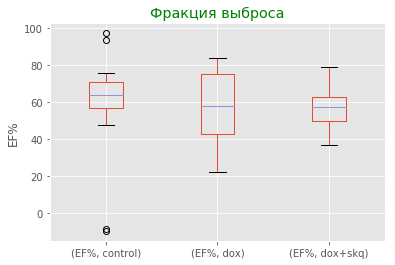

In [10]:
df_ef_means = pd.DataFrame(all_baselines.groupby(['group_type', 'rat_no'])['EF%'].mean())
reshape = df_ef_means.pivot_table(index='rat_no', columns='group_type')
# reshape = reshape.as_matrix(columns=None)
# plt.boxplot(x = reshape)
plt.title('Фракция выброса', color='green')
plt.ylabel('EF%')
# plt.show()
reshape.boxplot()

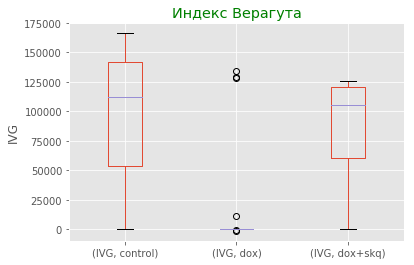

In [12]:
df_ivg_means = pd.DataFrame(all_baselines.groupby(['group_type', 'rat_no'])['IVG'].mean())
reshape = df_ivg_means.pivot_table(index='rat_no', columns='group_type')
# reshape = reshape.as_matrix(columns=None)
# plt.boxplot(x = reshape)
plt.title('Индекс Верагута', color='green')
plt.ylabel('IVG')
# plt.show()
reshape.boxplot()


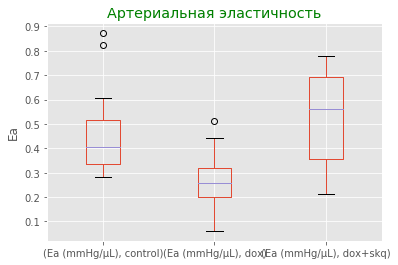

In [13]:
df_ea_means = pd.DataFrame(all_baselines.groupby(['group_type', 'rat_no'])['Ea (mmHg/µL)'].mean())
reshape = df_ea_means.pivot_table(index='rat_no', columns='group_type')
# reshape = reshape.as_matrix(columns=None)
# plt.boxplot(x = reshape)
plt.title('Артериальная эластичность', color='green')
plt.ylabel('Ea')
# plt.show()
reshape.boxplot()

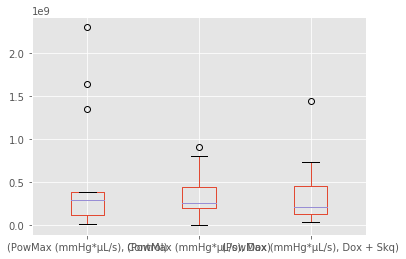

In [10]:
df_sw_means = pd.DataFrame(result_df.groupby(['group_type', 'rat_no'])['PowMax (mmHg*µL/s)'].mean())
reshape = df_sw_means.pivot_table(index='rat_no', columns='group_type')
# reshape = reshape.as_matrix(columns=None)
# plt.boxplot(x = reshape)
# plt.title('all baselines dox', color='green')
# plt.ylabel('SW')
# plt.show()
reshape.boxplot()